Customer Churn for Telco

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Dataset
df = pd.read_csv("Telco-Customer-Churn.csv")
df.shape

(7043, 21)

In [2]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
columns = df.columns
binary_cols = []

for col in columns:
    if df[col].value_counts().shape[0] == 2:
        binary_cols.append(col)

In [6]:
binary_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [7]:
# Categorical features with multiple classes
multiple_cols_cat = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']

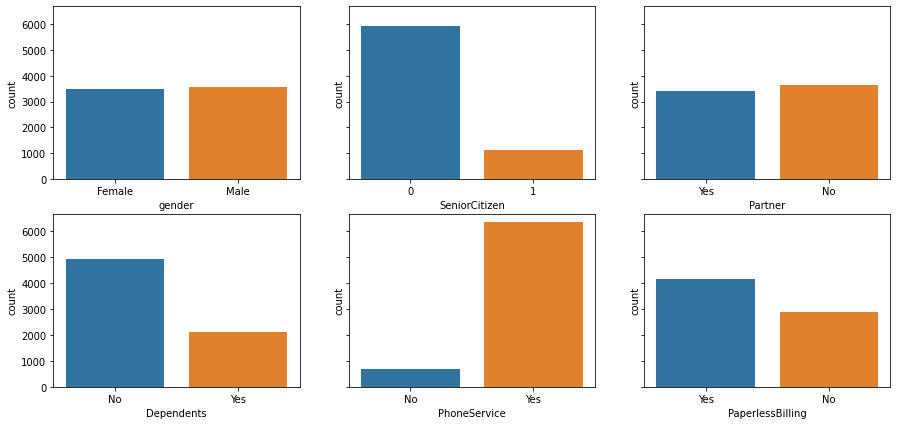

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(15, 7), sharey=True)

sns.countplot("gender", data=df, ax=axes[0,0])
sns.countplot("SeniorCitizen", data=df, ax=axes[0,1])
sns.countplot("Partner", data=df, ax=axes[0,2])
sns.countplot("Dependents", data=df, ax=axes[1,0])
sns.countplot("PhoneService", data=df, ax=axes[1,1])
sns.countplot("PaperlessBilling", data=df, ax=axes[1,2])

In [9]:
churn_numeric = []
for i in range(len(df)):
    if df["Churn"][i]=='Yes':
        churn_numeric.append(1)
    else:
        churn_numeric.append(0)
        
df['Churn'] = churn_numeric        

In [10]:
df[['gender','Churn']].groupby(['gender']).mean()

,Churn
gender,
Female,0.269209
Male,0.261603


In [11]:
df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

,Churn
SeniorCitizen,
0,0.236062
1,0.416813


In [12]:
table = pd.pivot_table(df, values='Churn', index=['gender'],
                      columns=['SeniorCitizen'], aggfunc=np.mean)

In [13]:
table

SeniorCitizen,0,1
gender,,
Female,0.239384,0.422535
Male,0.232808,0.411150


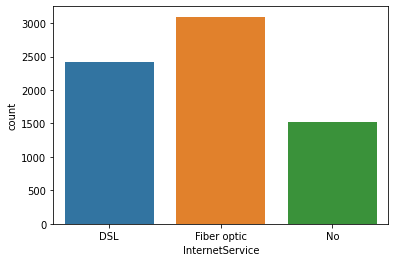

In [14]:
sns.countplot("InternetService", data=df)

In [15]:
df[['InternetService','Churn']].groupby('InternetService').mean()

,Churn
InternetService,
DSL,0.189591
Fiber optic,0.418928
No,0.074050


In [16]:
df[['InternetService','MonthlyCharges']].groupby('InternetService').mean()

,MonthlyCharges
InternetService,
DSL,58.102169
Fiber optic,91.500129
No,21.079194


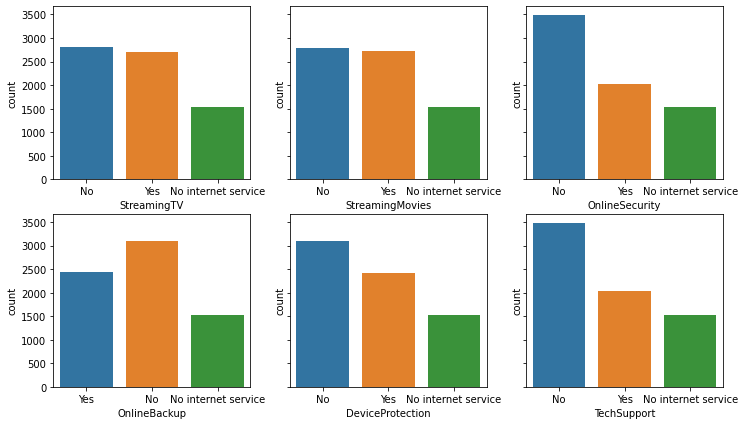

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)
sns.countplot("StreamingTV", data=df, ax=axes[0,0])
sns.countplot("StreamingMovies", data=df, ax=axes[0,1])
sns.countplot("OnlineSecurity", data=df, ax=axes[0,2])
sns.countplot("OnlineBackup", data=df, ax=axes[1,0])
sns.countplot("DeviceProtection", data=df, ax=axes[1,1])
sns.countplot("TechSupport", data=df, ax=axes[1,2])

In [18]:
df[['OnlineSecurity','Churn']].groupby(['OnlineSecurity']).mean()

,Churn
OnlineSecurity,
No,0.417667
No internet service,0.074050
Yes,0.146112


In [19]:
df.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [20]:
df.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

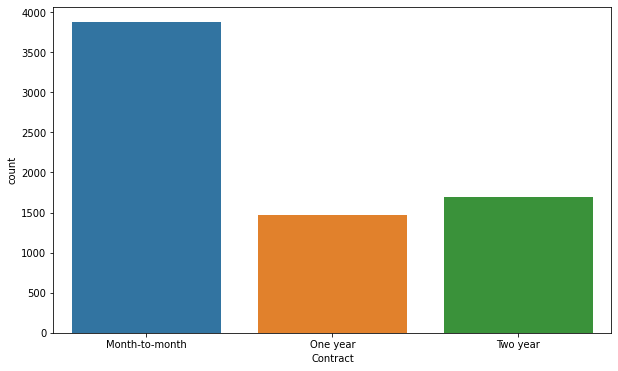

In [21]:
plt.figure(figsize=(10,6))
sns.countplot("Contract", data=df)

In [22]:
df[['Contract','Churn']].groupby('Contract').mean()

,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


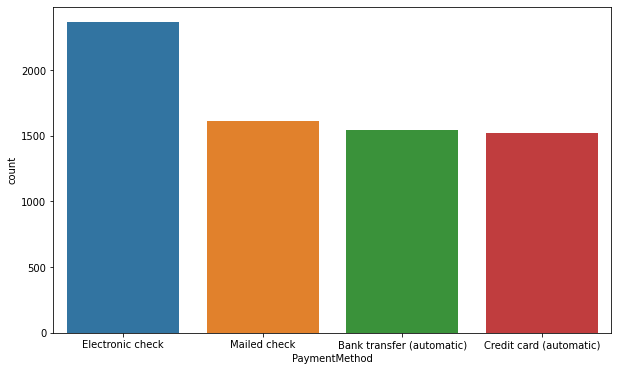

In [23]:
plt.figure(figsize=(10,6))
sns.countplot("PaymentMethod", data=df)

In [24]:
df[['PaymentMethod','Churn']].groupby('PaymentMethod').mean()

,Churn
PaymentMethod,
Bank transfer (automatic),0.167098
Credit card (automatic),0.152431
Electronic check,0.452854
Mailed check,0.191067


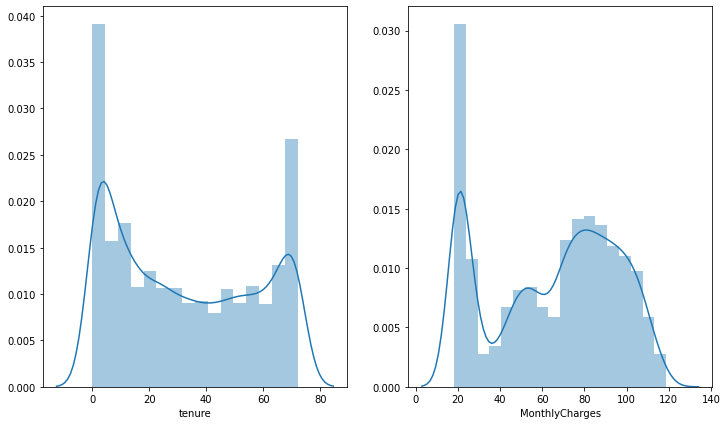

In [25]:
##Tenure: Number of months the customer has stayed with the company.

fig, axes = plt.subplots(1,2, figsize=(12, 7))
sns.distplot(df["tenure"], ax=axes[0])
sns.distplot(df["MonthlyCharges"], ax=axes[1])

In [26]:
df[['tenure','MonthlyCharges','Churn']].groupby('Churn').mean()

,tenure,MonthlyCharges
Churn,,
0,37.569965,61.265124
1,17.979133,74.441332


In [27]:
df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [29]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents',
'MultipleLines', 'InternetService','OnlineSecurity' ,'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']


X = pd.get_dummies(df, columns=cat_features, drop_first=True)

In [30]:
#StandardScaler,RobustScaler

scaler = MinMaxScaler()
tenure = scaler.fit_transform(df[['tenure']])
MonthlyCharges = scaler.fit_transform(df[['MonthlyCharges']])

X['tenure'] = tenure
X['MonthlyCharges'] = MonthlyCharges

In [31]:
X['tenure']

0       0.013889
1       0.472222
2       0.027778
3       0.625000
4       0.027778
          ...   
7038    0.333333
7039    1.000000
7040    0.152778
7041    0.055556
7042    0.916667
Name: tenure, Length: 7043, dtype: float64

In [32]:
X['MonthlyCharges']

0       0.115423
1       0.385075
2       0.354229
3       0.239303
4       0.521891
          ...   
7038    0.662189
7039    0.845274
7040    0.112935
7041    0.558706
7042    0.869652
Name: MonthlyCharges, Length: 7043, dtype: float64

Text(0.5, 1.0, 'Class Distribution Before Resampling')

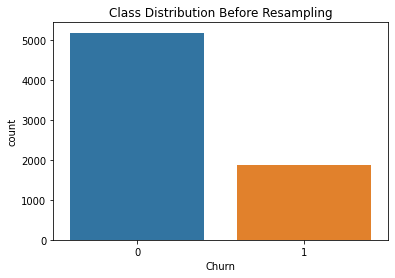

In [33]:
sns.countplot('Churn', data=df).set_title('Class Distribution Before Resampling')

In [34]:
X_no = X[X.Churn == 0]
X_yes = X[X.Churn == 1]

In [35]:
X_yes_upsampled = X_yes.sample(n=len(X_no), replace=True, random_state=42)
print(len(X_yes_upsampled))

5174


Text(0.5, 1.0, 'Class Distribution After Resampling')

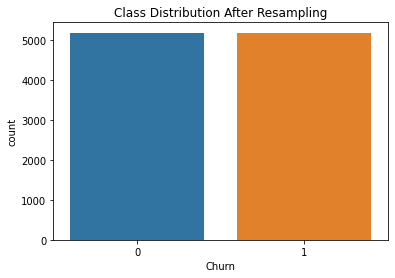

In [36]:
X_upsampled = X_no.append(X_yes_upsampled).reset_index(drop=True)

sns.countplot('Churn', data = X_upsampled).set_title('Class Distribution After Resampling')

In [37]:
from sklearn.model_selection import train_test_split
X = X_upsampled.drop(['Churn'], axis=1) #features (independent variables)
y = X_upsampled['Churn'] #target (dependent variable)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

In [40]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Logistic RidgeClassifier', RidgeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Decision Tree (CART)',DecisionTreeClassifier())) 
models.append(('K-NN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('AdaBoostClassifier', AdaBoostClassifier(learning_rate=0.5)))
models.append(('BaggingClassifier', BaggingClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier())) 

In [41]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("%s -> ACC: %%%.2f" % (name,accuracy_score(y_test,y_pred)*100))
    #report = classification_report(y_test,y_pred)
    #print(report)

Logistic Regression -> ACC: %76.04
Logistic RidgeClassifier -> ACC: %76.09


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
clf_ridge = RidgeClassifier() #create a ridge classifier object
clf_ridge.fit(X_train, y_train) #train the model

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[150,200,250,300], 'max_depth':[15,20,25]}
forest = RandomForestClassifier()
clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

In [ ]:
clf.fit(X, y)

In [ ]:
clf.best_params_

In [ ]:
clf.best_score_